In [1]:
import pandas as pd
trainDf = pd.read_csv("train.csv")
testDf = pd.read_csv("test.csv")

In [2]:
#資料檢視

In [3]:
trainDf.columns
print(trainDf.shape)
print(testDf.shape)

(1460, 81)
(1459, 80)


In [4]:
trainDf.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
fin = open('data_description.txt','r')
words = fin.read()
fin.close()

In [6]:
print(words)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [7]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
trainDf['MSSubClass'] = trainDf['MSSubClass'].apply(str)
testDf['MSSubClass'] = testDf['MSSubClass'].apply(str)

In [9]:
#缺失值處理

In [10]:
mergeDf = pd.concat(objs=[trainDf,testDf], axis=0, ignore_index=True, sort=False)   #concat=concatenate, objs=objects, axis=0 is along index
mergeDf.shape

(2919, 81)

In [11]:
total = mergeDf.isnull().sum(axis = 0)
percent = mergeDf.isnull().sum(axis = 0) / len(mergeDf)*100
naDf = pd.DataFrame( {'total' : total, 
                      'percent' : percent, 
                      'dtype' : mergeDf.dtypes} )
naDf[naDf.total > 0].sort_values(by = 'total', ascending = False)  #sort_values = sort value, by = names to sort by, ascending = sort ascending 

,total,percent,dtype
PoolQC,2909,99.657417,object
MiscFeature,2814,96.402878,object
Alley,2721,93.216855,object
Fence,2348,80.438506,object
SalePrice,1459,49.982871,float64
FireplaceQu,1420,48.646797,object
LotFrontage,486,16.649538,float64
GarageCond,159,5.447071,object
GarageYrBlt,159,5.447071,float64
GarageFinish,159,5.447071,object


In [12]:
# mergeDf.Fence.value_counts()
fillna_dict = {
    'Fence':0,
    'FireplaceQu':0,
    'LotFrontage':mergeDf['LotFrontage'].median(),
    'GarageCond':0,
    'GarageQual':0,
    'GarageFinish':0,
    'GarageYrBlt':mergeDf['YearBuilt'],
    'GarageType':'None',
    'BsmtCond':0,
    'BsmtExposure':0,
    'BsmtQual':0,
    'BsmtFinType2':0,
    'BsmtFinType1':0,
    'MasVnrType':'None',
    'MasVnrArea':0,
    'MSZoning':'None',
    'BsmtFullBath':0,
    'BsmtHalfBath':0,
    'Functional':mergeDf['Functional'].mode()[0],
    'Utilities':mergeDf['Utilities'].mode()[0],
    'KitchenQual':mergeDf['KitchenQual'].mode()[0],
    'TotalBsmtSF':0,
    'BsmtUnfSF':0,
    'BsmtFinSF2':0,
    'BsmtFinSF1':0,
    'GarageCars':0,
    'GarageArea':0,
    'Exterior2nd':mergeDf['Exterior2nd'].mode()[0],
    'Exterior1st':mergeDf['Exterior1st'].mode()[0],
    'SaleType':mergeDf['SaleType'].mode()[0],
    'Electrical':mergeDf['Electrical'].mode()[0] #df.mode() return dataframe, series.mode() return series
}

drop_list=['PoolQC','MiscFeature','Alley', 'Id']  #移除缺失值超過90%的欄位,以及ID


def pre_processing(fillna_dict = {},drop_list = []):
    
    # Step 1: Drop columns
    mergeDf.drop(labels = drop_list, axis = 1, inplace = True) #inplace=fill in-place
        
    # Step 2: Fill missing values
    for col, fill_value in fillna_dict.items():
        mergeDf[col] = mergeDf[col].fillna(value = fill_value)
    

pre_processing (fillna_dict = fillna_dict, drop_list = drop_list)

In [13]:
#資料型態

In [14]:
mergeDf.dtypes.value_counts()
#mergeDf.ExterQual.unique()   檢視欄位類別

object     41
int64      24
float64    12
dtype: int64

In [15]:
"""
ord_feature = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',  #順序資料
               'HeatingQC', 'KitchenQual', 'FireplaceQu',
               'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']
len(ord_feature)
"""

"\nord_feature = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',  #順序資料\n               'HeatingQC', 'KitchenQual', 'FireplaceQu',\n               'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']\nlen(ord_feature)\n"

In [16]:
'''
ordTrans_dict = {
    'ExterQual':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'ExterCond':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'BsmtQual':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'BsmtCond':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'BsmtExposure':{'Gd':4,'Av':3,'Mn':2,'No':1},
    'BsmtFinType1':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3, 'LwQ':2, 'Unf':1},
    'BsmtFinType2':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3, 'LwQ':2, 'Unf':1},
    'HeatingQC':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'KitchenQual':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'FireplaceQu':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'GarageFinish':{'Fin':3, 'RFn':2, 'Unf':1},
    'GarageQual':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'GarageCond':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'Fence':{'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1},
}

def pre_processing2(ordTrans_dict = {}):
    
    for col, book in ordTrans_dict.items():
        mergeDf[col] = mergeDf[col].replace(book)
            

pre_processing2 (ordTrans_dict = ordTrans_dict)
'''

"\nordTrans_dict = {\n    'ExterQual':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},\n    'ExterCond':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},\n    'BsmtQual':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},\n    'BsmtCond':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},\n    'BsmtExposure':{'Gd':4,'Av':3,'Mn':2,'No':1},\n    'BsmtFinType1':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3, 'LwQ':2, 'Unf':1},\n    'BsmtFinType2':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3, 'LwQ':2, 'Unf':1},\n    'HeatingQC':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},\n    'KitchenQual':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},\n    'FireplaceQu':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},\n    'GarageFinish':{'Fin':3, 'RFn':2, 'Unf':1},\n    'GarageQual':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},\n    'GarageCond':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},\n    'Fence':{'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1},\n}\n\ndef pre_processing2(ordTrans_dict = {}):\n    \n    for col, book in ordTrans_dict.items():\n        mergeDf[col] = mergeDf[col].replace(b

In [17]:
#新增變數：屋齡 = (銷售年分-重建日期)

In [18]:
houseage = (mergeDf['YrSold']-mergeDf['YearRemodAdd'])
mergeDf.insert(loc = len(mergeDf.columns)-1, column = 'houseage', value = houseage) #loc = location of column, column = label

In [19]:
print(mergeDf.shape)
newTrainDf = mergeDf.iloc[0:len(trainDf),]
newTestDf = mergeDf.iloc[len(trainDf):,]
print(newTrainDf.shape)
print(newTestDf.shape)

(2919, 78)
(1460, 78)
(1459, 78)


In [20]:
#重要變數_數值

In [21]:
numDf = newTrainDf.select_dtypes(include=['int64','float64'])
print('數值資料：', numDf.shape)

數值資料： (1460, 37)


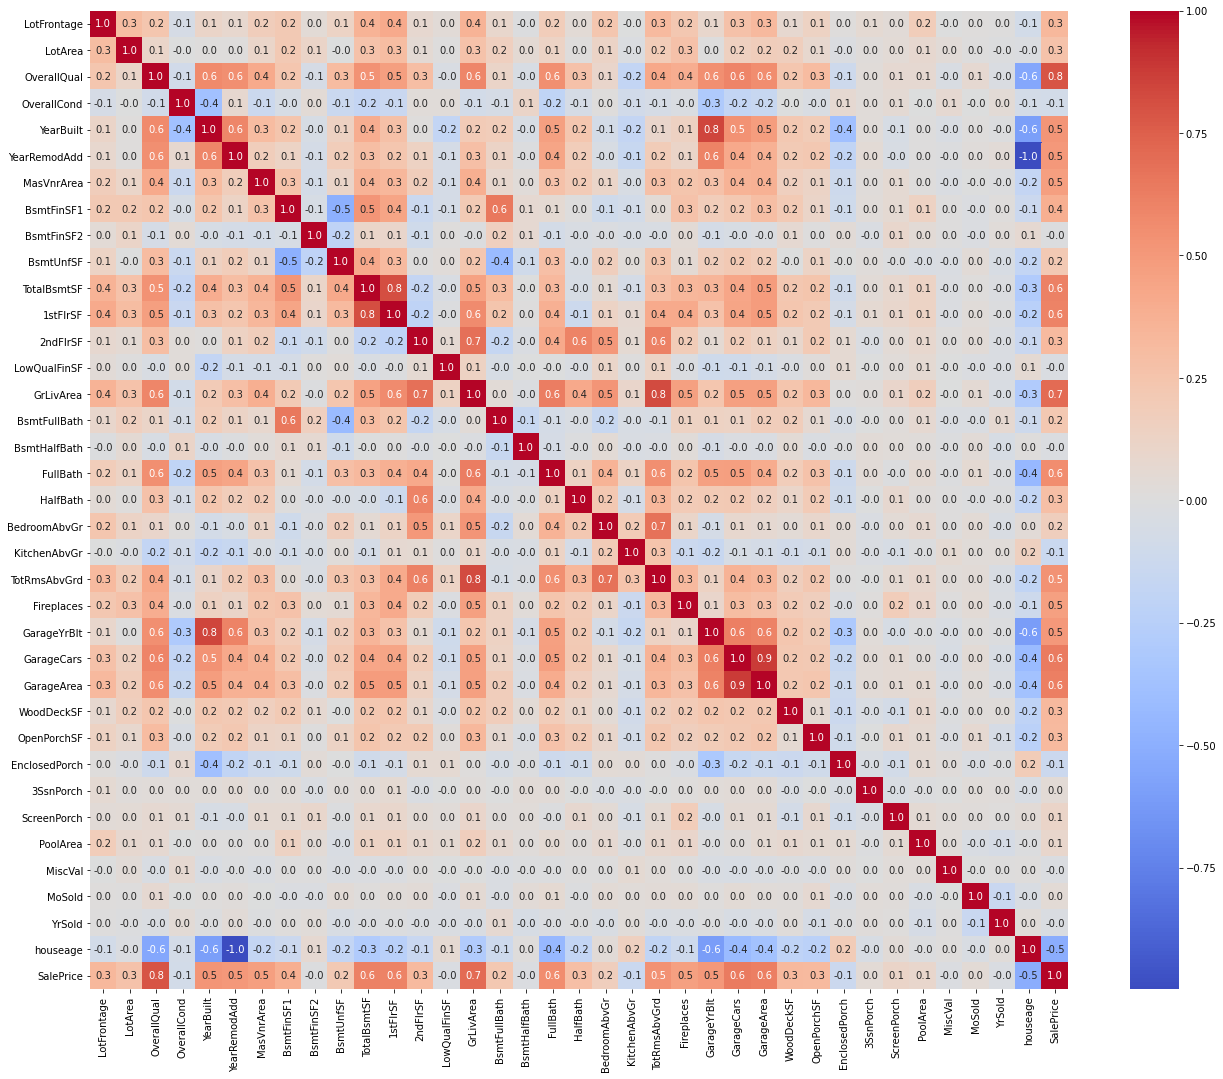

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(22,18))   #fig=figure, ax=axes, figsize=(xsize,ysize)
cor = numDf.corr('pearson')
sns.heatmap(data = cor, cmap='coolwarm', center=0, ax=ax, annot=True, square=True, fmt='.1f') #cmap=color of map, center=center value of colormap, annot=annotate, ax=axes, square=square-shaped, fmt=string format       

In [23]:
print('選擇數量特徵', (abs(cor.SalePrice) > 0).sum() - 1 ) 
cor.SalePrice[abs(cor.SalePrice) > 0].sort_values(ascending = False).head(10)

選擇數量特徵 36


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [24]:
select_num = cor.SalePrice[abs(cor['SalePrice']) > 0].index.tolist()
select_num.remove('SalePrice')

In [25]:
"""
fig, ax = plt.subplots(nrows = int(len(select_num)/3) + 1, ncols = 3, figsize = (20,20), sharey = True)  #sharey = share y axis
for i,col in zip(ax.flatten(), select_num):
    sns.scatterplot(y = newTrainDf['SalePrice'], x = newTrainDf[col], ax = i)
"""

"\nfig, ax = plt.subplots(nrows = int(len(select_num)/3) + 1, ncols = 3, figsize = (20,20), sharey = True)  #sharey = share y axis\nfor i,col in zip(ax.flatten(), select_num):\n    sns.scatterplot(y = newTrainDf['SalePrice'], x = newTrainDf[col], ax = i)\n"

In [26]:
#重要變數_類別

In [27]:
catDf = newTrainDf.select_dtypes(include=['object'])
print('類別資料：', catDf.shape)

類別資料： (1460, 41)


In [28]:
"""
fig, ax = plt.subplots(9,3,figsize=(20,60))
for i,col in zip(ax.flatten(),catDf.columns):  #flatten = 把多維陣列攤成一維
    sns.boxplot(data = newTrainDf,x = col,y = 'SalePrice',ax = i)
"""

"\nfig, ax = plt.subplots(9,3,figsize=(20,60))\nfor i,col in zip(ax.flatten(),catDf.columns):  #flatten = 把多維陣列攤成一維\n    sns.boxplot(data = newTrainDf,x = col,y = 'SalePrice',ax = i)\n"

In [29]:
catDf = pd.get_dummies(catDf)
cor2 = pd.concat([catDf, newTrainDf['SalePrice']],axis = 1).corr('pearson')
print('選擇類別特徵', (abs(cor2.SalePrice) > 0).sum() - 1)
cor2.SalePrice[abs(cor2.SalePrice) > 0].sort_values(ascending=False).head(10)

選擇類別特徵 269


SalePrice               1.000000
BsmtQual_Ex             0.553105
KitchenQual_Ex          0.504094
Foundation_PConc        0.497734
ExterQual_Gd            0.452466
ExterQual_Ex            0.451164
BsmtFinType1_GLQ        0.434597
HeatingQC_Ex            0.434543
GarageFinish_Fin        0.419678
Neighborhood_NridgHt    0.402149
Name: SalePrice, dtype: float64

In [30]:
select_cat = cor2.SalePrice[abs(cor2.SalePrice) > 0].sort_values(ascending=False).index.tolist()
select_cat.remove('SalePrice')

In [31]:
#資料分配

In [32]:
newTrainDf.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

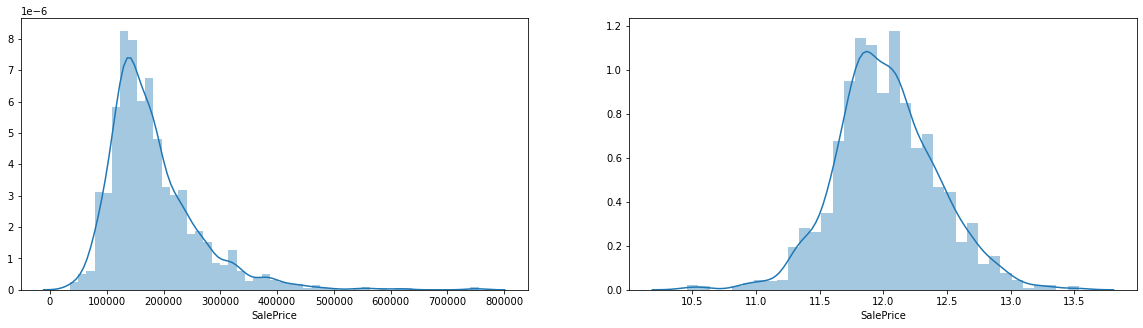

In [33]:
import numpy as np
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))   #fig=figure, ax=axes, figsize=(xsize,ysize)
sns.distplot(newTrainDf['SalePrice'], ax = ax[0])   # distplot = 同時呈現直方圖和機率密度
sns.distplot(np.log1p(newTrainDf['SalePrice']), ax = ax[1])

In [34]:
# 模型資料

In [35]:
print('特徵個數',len(select_cat) + len(select_num))
cat_data = pd.get_dummies(newTrainDf)[select_cat]  
num_data = newTrainDf[select_num]

特徵個數 305


In [36]:
train_df = pd.concat([cat_data,num_data,newTrainDf.SalePrice],axis=1)
train_df

,BsmtQual_Ex,KitchenQual_Ex,Foundation_PConc,ExterQual_Gd,ExterQual_Ex,BsmtFinType1_GLQ,HeatingQC_Ex,GarageFinish_Fin,Neighborhood_NridgHt,MSSubClass_60,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,houseage,SalePrice
0,0,0,1,1,0,1,1,0,0,1,...,61,0,0,0,0,0,2,2008,5,208500.0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,5,2007,31,181500.0
2,0,0,1,1,0,1,1,0,0,1,...,42,0,0,0,0,0,9,2008,6,223500.0
3,0,0,0,0,0,0,0,0,0,0,...,35,272,0,0,0,0,2,2006,36,140000.0
4,0,0,1,1,0,1,1,0,0,1,...,84,0,0,0,0,0,12,2008,8,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,1,0,0,1,...,40,0,0,0,0,0,8,2007,7,175000.0
1456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2010,22,210000.0
1457,0,0,0,0,1,1,1,0,0,0,...,60,0,0,0,0,2500,5,2010,4,266500.0
1458,0,0,0,0,0,1,0,0,0,0,...,0,112,0,0,0,0,4,2010,14,142125.0


In [37]:
from sklearn.metrics import mean_squared_error
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = train_df.drop(["SalePrice"], axis = 1)  # 自變數   
Y = train_df['SalePrice']   # 應變數
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, shuffle = True)  #shuffle = shuffle the data, random_state = produce the same results across different calls   

print('訓練資料Feature大小：', X_train.shape)
print('測試資料Feature大小：', X_test.shape)

訓練資料Feature大小： (1095, 305)
測試資料Feature大小： (365, 305)


In [39]:
# 模型1：線性

In [40]:
import numpy as np
lin_reg = LinearRegression()
lin_reg.fit(X_train, np.log1p(Y_train)) 
print("R Square_train: ", lin_reg.score(X_train, np.log1p(Y_train)))  #score = Return the coefficient of determination of the prediction.
print("R Square_test: ", lin_reg.score(X_test, np.log1p(Y_test)))  #score = Return the coefficient of determination of the prediction.
Y_pred = lin_reg.predict(X_test)
print("RMSE: ", rmse(Y_pred,np.log1p(Y_test)))   #expm1 = inverse of log1p
print("RMSE: ", rmse(Y_test, np.expm1(Y_pred)))   #expm1 = inverse of log1p

coef = pd.DataFrame({'特徵':X.columns,
                     '係數':lin_reg.coef_})
coef

R Square_train:  0.9469279595978383
R Square_test:  0.9031597563122844
RMSE:  0.12949353347945824
RMSE:  22578.441924000494


,特徵,係數
0,BsmtQual_Ex,0.021451
1,KitchenQual_Ex,0.035776
2,Foundation_PConc,0.051091
3,ExterQual_Gd,0.006835
4,ExterQual_Ex,0.031825
...,...,...
300,PoolArea,0.000092
301,MiscVal,-0.000015
302,MoSold,-0.000489
303,YrSold,-0.001253


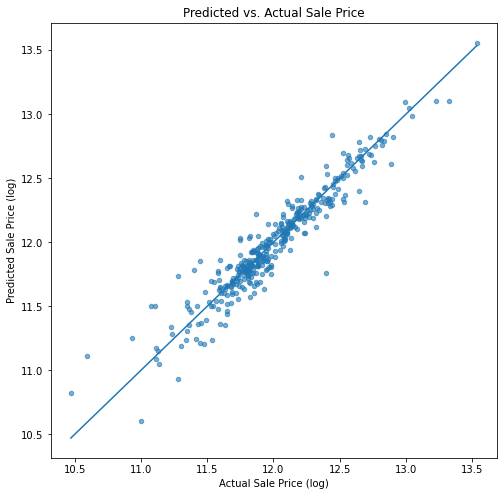

In [41]:
plt.figure(figsize=(8, 8))
plt.scatter(np.log1p(Y_test), Y_pred, s=20, alpha = 0.6)  # s= marker size, alpha = transparent ratio
plt.title('Predicted vs. Actual Sale Price')
plt.xlabel('Actual Sale Price (log)')
plt.ylabel('Predicted Sale Price (log)')
plt.plot([min(np.log1p(Y_test)), max(np.log1p(Y_test))], [min(np.log1p(Y_test)), max(np.log1p(Y_test))]) #畫全等線

In [42]:
# 模型2：lasso和 Ridge

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.6,normalize=True)
lasso.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1353035113.0108643, tolerance: 664823241.805396
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.6, normalize=True)

In [44]:
lasso_coef = lasso.fit(X_train,Y_train).coef_
coef = pd.DataFrame({'變數': X.columns, 'Lasso係數': lasso_coef})
coef

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1353035113.0108643, tolerance: 664823241.805396
  model = cd_fast.enet_coordinate_descent(


,變數,Lasso係數
0,BsmtQual_Ex,19169.113650
1,KitchenQual_Ex,21985.328463
2,Foundation_PConc,2553.863761
3,ExterQual_Gd,-1095.583867
4,ExterQual_Ex,18358.418627
...,...,...
300,PoolArea,87.282924
301,MiscVal,-2.067084
302,MoSold,-427.966799
303,YrSold,-86.025112


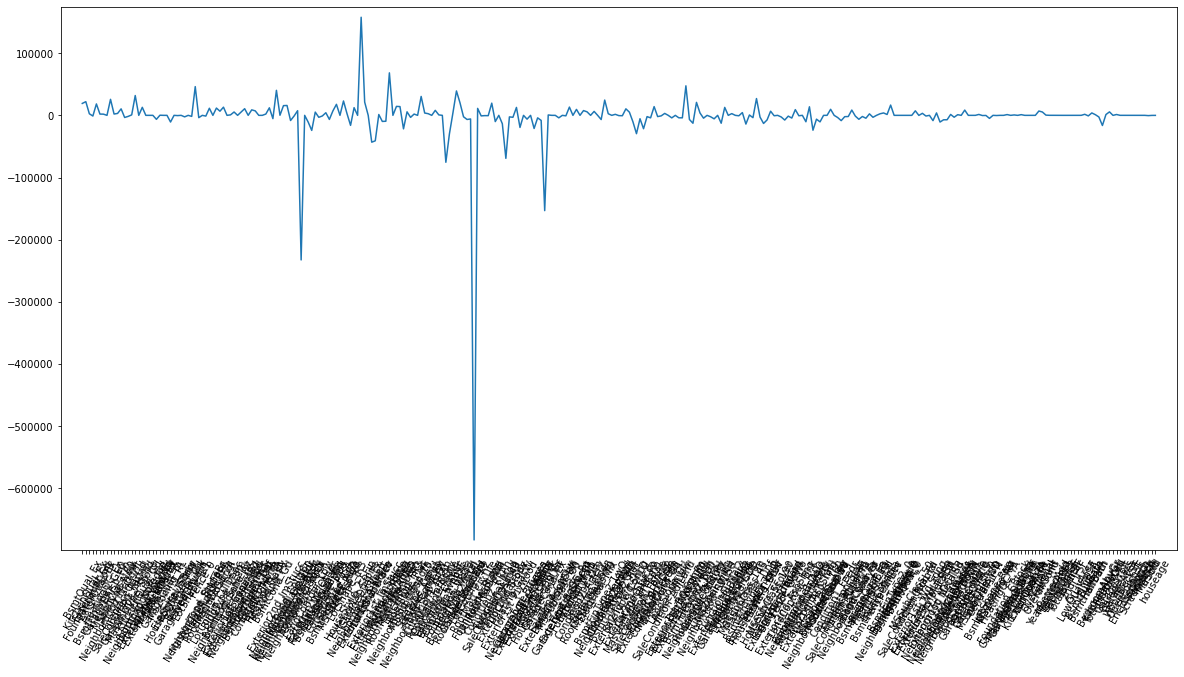

In [45]:
plt.figure(figsize=(20,10))
plt.plot(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [46]:
print("R Square: ", lasso.score(X_test, Y_test))  #score = Return the coefficient of determination of the prediction.
predicted_Y = lasso.predict(X_test)
print("MSE: ", np.sqrt(mean_squared_error(Y_test,predicted_Y)))

R Square:  0.9005890529398117
MSE:  26389.4753138891


In [47]:
'''
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score 


def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='red')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, Y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
#print(ridge_scores,alpha_space)
'''

"\nfrom sklearn.linear_model import Ridge\nfrom sklearn.model_selection import cross_val_score \n\n\ndef display_plot(cv_scores, cv_scores_std):\n    fig = plt.figure()\n    ax = fig.add_subplot(1,1,1)\n    ax.plot(alpha_space, cv_scores)\n\n    std_error = cv_scores_std / np.sqrt(10)\n\n    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)\n    ax.set_ylabel('CV Score +/- Std Error')\n    ax.set_xlabel('Alpha')\n    ax.axhline(np.max(cv_scores), linestyle='--', color='red')\n    ax.set_xlim([alpha_space[0], alpha_space[-1]])\n    ax.set_xscale('log')\n    plt.show()\n\n# Setup the array of alphas and lists to store scores\nalpha_space = np.logspace(-4, 0, 50)\nridge_scores = []\nridge_scores_std = []\n\n# Create a ridge regressor: ridge\nridge = Ridge(normalize=True)\n\n# Compute scores over range of alphas\nfor alpha in alpha_space:\n\n    # Specify the alpha value to use: ridge.alpha\n    ridge.alpha = alpha\n    \n    # Perform 10-fold CV: ridge_

In [48]:
# 模型3：KNN

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knnModel = KNeighborsRegressor(n_neighbors = 4) 
knnModel.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=4)

In [50]:
Y_pred = knnModel.predict(X_test)
print("R Square: ", knnModel.score(X_test,Y_test))
print("RMSE: ", rmse(Y_test,Y_pred))

R Square:  0.7223455024829712
RMSE:  44102.78409441707


Text(0, 0.5, 'Predicted Sale Price')

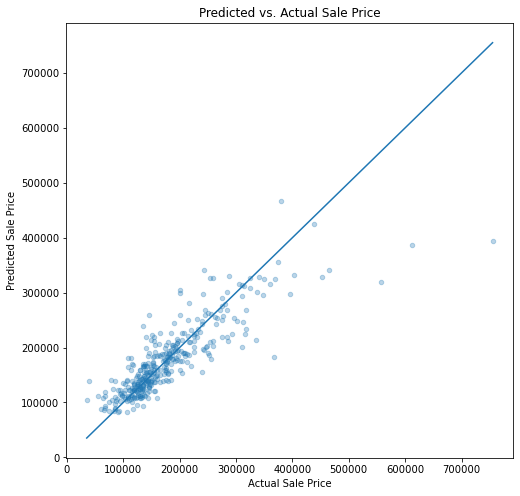

In [51]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test,Y_pred, s=20, alpha = 0.3)   
plt.plot([min(Y_test),max(Y_test)], [min(Y_test),max(Y_test)])
plt.title('Predicted vs. Actual Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

Text(0, 0.5, 'RMSE')

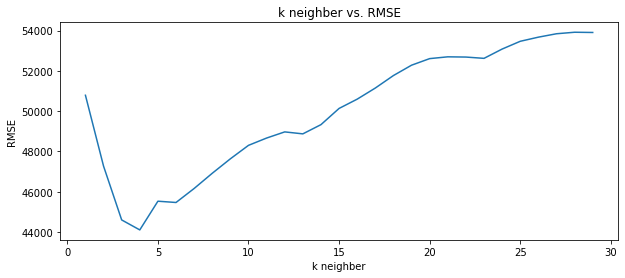

In [52]:
RMSE_dict={}
for k in range(1,30):
    knnModel = KNeighborsRegressor(n_neighbors=k)
    knnModel.fit(X_train,Y_train)
    Y_pred = knnModel.predict(X_test)
    RMSE_dict[k] = np.sqrt(mean_squared_error(Y_test,Y_pred))
plt.figure(figsize = (10,4))
plt.plot(list(RMSE_dict.keys()),list(RMSE_dict.values()))
plt.title('k neighber vs. RMSE')
plt.xlabel('k neighber')
plt.ylabel('RMSE')

In [53]:
# 模型4：決策樹

In [54]:
#回歸樹
#1.適合散布圖為分區的資料
#2.樹的結構：root、branch、leaf
#3.每個節點左為True，右為False
#3.葉的值為該組平均數
#4.挑選值做節點得指標：各指標最小SSE
#5.挑選特徵做節點的指標：各特徵最小SSE(分類資料為Entropy、Gini)
#6.重複在每一個節點該組的資料作挑選
#7.深度越高，越容易Overfitting

In [55]:
from sklearn.tree import DecisionTreeRegressor

Text(0, 0.5, 'RMSE')

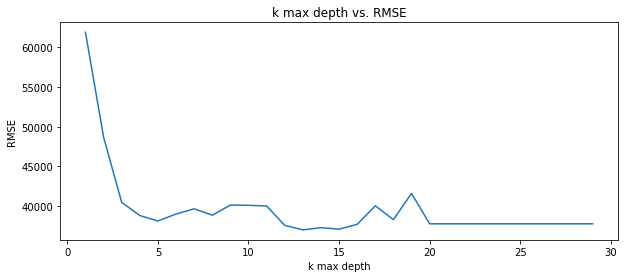

In [57]:
RMSE_dict={}
for k in range(1,30):
    treeModel = DecisionTreeRegressor(random_state=0, max_depth = k)
    treeModel.fit(X_train,Y_train)
    Y_pred = treeModel.predict(X_test)
    RMSE_dict[k] = np.sqrt(mean_squared_error(Y_test,Y_pred))
plt.figure(figsize = (10,4))
plt.plot(list(RMSE_dict.keys()),list(RMSE_dict.values()))
plt.title('k max depth vs. RMSE')
plt.xlabel('k max depth')
plt.ylabel('RMSE')

In [ ]:
treeModel = DecisionTreeRegressor(random_state=0, max_depth = 13)
treeModel.fit(X_train,Y_train)
Y_pred = treeModel.predict(X_test)
print('R Square on train set: {:.3f}'.format(treeModel.score(X_train,Y_train)))
print('R Square on test set: {:.3f}'.format(treeModel.score(X_test,Y_test)))
print("RMSE: ", np.sqrt(mean_squared_error(Y_test,Y_pred)))

In [58]:
from sklearn.tree import export_graphviz
export_graphviz(treeModel, out_file="tree01.dot", class_names = X.columns,
               feature_names = X.columns, impurity=False,filled=True)

In [59]:
import graphviz

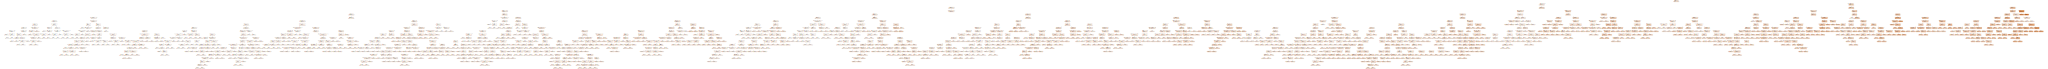

In [60]:
with open("tree01.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [61]:
df1 = pd.DataFrame(X.columns,columns = ['Feature_Names'])
df1['feature_importances'] = treeModel.feature_importances_    #決策樹的「特徵重要性」
top10 = df1.sort_values(by = 'feature_importances', ascending = False).head(10)
top10

,Feature_Names,feature_importances
271,OverallQual,0.632482
283,GrLivArea,0.105518
281,2ndFlrSF,0.030679
279,TotalBsmtSF,0.028192
280,1stFlrSF,0.026079
276,BsmtFinSF1,0.025076
269,LotFrontage,0.017060
270,LotArea,0.011901
294,GarageArea,0.011817
273,YearBuilt,0.010018


In [62]:
def plot_feature_importances(model):
    n_features= len(top10.Feature_Names)
    plt.barh(range(n_features),top10.feature_importances,align='center')
    plt.yticks(np.arange(n_features), top10.Feature_Names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

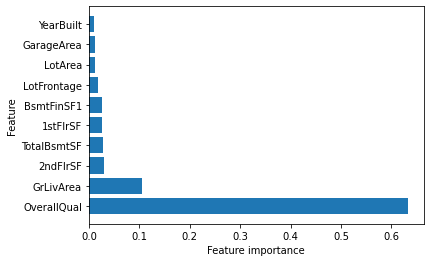

In [63]:
plot_feature_importances(treeModel)

In [64]:
# 模型5：XGB

In [65]:
# 參數設定
#Eta: shrinks the feature weights to make the boosting process more conservative.
#     range: [0,1]
#lambda: regularization term on weights. Increasing this value will make model more conservative.
#Gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative  
#     range: [0,∞]

In [70]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth = 5, learning_rate = 0.1, gamma = 0, reg_lambda = 0.45, n_estimators = 500)

In [71]:
xgb.get_params() #檢視參數設定

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': 0,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_delta_step': None,
 'max_depth': 5,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 500,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': 0.45,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [72]:
xgb.fit(X_train, Y_train)
print("R Square_train: {:.3f}".format(xgb.score(X_train, Y_train)))
print("R Square_test: {:.3f}".format(xgb.score(X_test, Y_test)))
Y_pred = xgb.predict(X_test)
print("RMSE_test: %.3f" % (rmse(Y_test,Y_pred)))

R Square_train: 1.000
R Square_test: 0.917
RMSE_test: 24073.645


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Text(0, 0.5, 'Predicted Sale Price')

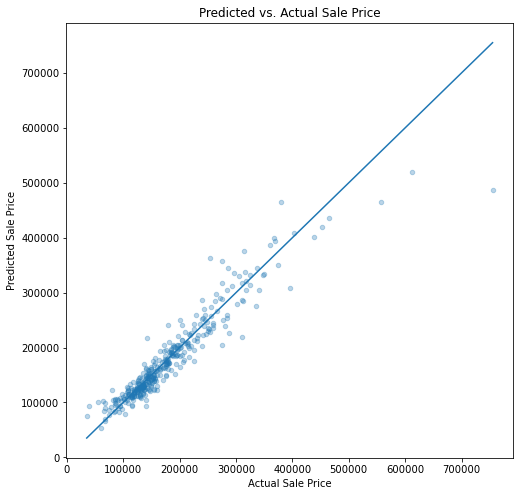

In [69]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test,Y_pred, s=20, alpha = 0.3)   
plt.plot([min(Y_test),max(Y_test)], [min(Y_test),max(Y_test)])
plt.title('Predicted vs. Actual Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

In [75]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import xgboost as xgb

xgbr = xgb.XGBRegressor()
params = {'learning_rate': [0.10,0.14,0.15,0.16, 0.2], 'max_depth' : [3, 4, 5, 6, 7], 'n_estimators':[100, 200, 300], 'reg_lambda':[0.5,1,1.5]}

xgbr_reg = GridSearchCV(xgbr, params, cv = 10, n_jobs =1)
xgbr_reg.fit(X_train,Y_train)

print("Best params:{}".format(xgbr_reg.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar